# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import datetime


# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [3]:
transcript.tail(7)


,person,event,value,time
306527,24f56b5e1849462093931b164eb803b5,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714
306528,5ca2620962114246ab218fc648eb3934,transaction,{'amount': 2.2},714
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714
306533,c02b10e8752c4d8e9b73f918558531f7,transaction,{'amount': 4.05},714


In [ ]:
profile.head(7)


In [ ]:
portfolio.head(7)


In [ ]:
transcript.shape,portfolio.shape,profile.shape

In [ ]:
profile.info()

# Data Understanding/Exploring


### profile

In [ ]:
import seaborn as sns
sns.histplot(data=profile['income'],color='red')

In [ ]:
sns.histplot(data=profile['age'],color='red',bins=10)

In [ ]:
sns.histplot(data=profile['became_member_on'],color='red',bins=5)

In [ ]:
profile.isnull().sum()

In [ ]:
profile[['age','income']].describe()

max age is 118 is weird and the avg age is 62.53 with sd of 26.74

### portfolio


In [ ]:
portfolio.head()

In [ ]:

portfolio.groupby('offer_type').sum() ['web', 'email', 'mobile', 'social'].plot(kind='bar');

### transcipt

In [ ]:
transcript.head()

In [ ]:
transcript['event'].unique()


In [ ]:
transcript['event'].value_counts().plot(kind='bar');

# Data Preprocessing

### cleaning profile

In [2]:
profile[profile['age']>110]['income'].isnull().sum()

2175

In [2]:
# convert dates to Datetime

profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
profile['member_duration'] = datetime.datetime.today().date() - profile['became_member_on'].dt.date
profile['member_duration'] = profile['member_duration'].dt.days


# fill empty genders
profile['gender'] = profile['gender'].fillna('NA')
profile[['age','income']] = profile[['age','income']].astype('int', errors='ignore')
profile=profile.drop( profile[profile['age']>100].index )
profile['income'] = profile['income'].fillna(profile['income'].mean())

In [6]:
profile.head()

,age,id,income,member_duration,gender_F,gender_M,gender_O,year_joined_2013,year_joined_2014,year_joined_2015,year_joined_2016,year_joined_2017,year_joined_2018
1,55,0610b486422d4921ae7d2bf64640c50b,112000.0,1657,1,0,0,0,0,0,0,1,0
3,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1724,1,0,0,0,0,0,0,1,0
5,68,e2127556f4f64592b11af22de27a7932,70000.0,1372,0,1,0,0,0,0,0,0,1
8,65,389bc3fa690240e798340f5a15918d5c,53000.0,1448,0,1,0,0,0,0,0,0,1
12,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,1538,0,1,0,0,0,0,0,1,0


In [3]:
#converting cat to numerical for profile, one hot encoding
profile['year'] = profile['became_member_on'].apply(lambda x: str(x.year))
profile=profile.drop(['became_member_on'], axis=1)
gender_dummies = profile['gender'].str.get_dummies().add_prefix('gender_')
year_joined_dummies = profile['year'].str.get_dummies().add_prefix('year_joined_')

profile = pd.concat([profile, gender_dummies, year_joined_dummies], axis=1)
profile=profile.drop(['year','gender'], axis=1)


In [6]:
profile.head()

,age,id,income,member_duration,gender_F,gender_M,gender_O,year_joined_2013,year_joined_2014,year_joined_2015,year_joined_2016,year_joined_2017,year_joined_2018
1,55,0610b486422d4921ae7d2bf64640c50b,112000.0,1654,1,0,0,0,0,0,0,1,0
3,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1721,1,0,0,0,0,0,0,1,0
5,68,e2127556f4f64592b11af22de27a7932,70000.0,1369,0,1,0,0,0,0,0,0,1
8,65,389bc3fa690240e798340f5a15918d5c,53000.0,1445,0,1,0,0,0,0,0,0,1
12,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,1535,0,1,0,0,0,0,0,1,0


In [ ]:
profile.isnull().sum()

### cleaning portfolio

In [ ]:
portfolio.head()

In [4]:
#manually one hot encode the channels list
portfolio['channel_email'] = portfolio['channels'].apply(lambda x: 1 if 'email' in x else 0)
portfolio['channel_mobile'] = portfolio['channels'].apply(lambda x: 1 if 'mobile' in x else 0)
portfolio['channel_social'] = portfolio['channels'].apply(lambda x: 1 if 'social' in x else 0)
portfolio['channel_web'] = portfolio['channels'].apply(lambda x: 1 if 'web' in x else 0)
portfolio = portfolio.drop('channels', axis=1)
portfolio.head()

,reward,difficulty,duration,offer_type,id,channel_email,channel_mobile,channel_social,channel_web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


### cleaning Transcript and Merging


In [9]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [5]:
#split the amount from the transactions and make it a new feature bcuz its very useful information
# transcript['offer_id'] = transcript[transcript.event.isin(['offer received', 'offer viewed', 'offer completed'])].value.apply(lambda x: x['offer id']) # i need try offer_id except offer id
# for idx, row in transcript.iterrows():
#     for v in row['value']:
#         if v == 'offer_id' or v == 'offer id':
#             transcript.at[idx, 'offer_id'] = row['value'][v]
transcript_new=transcript.copy()
transcript_new['offer_id'] = transcript_new['value'].apply(lambda x: x['offer id'] if 'offer id' in x else x['offer_id'] if 'offer_id' in x else np.nan)
transcript_new['amount'] = transcript_new['value'].apply(lambda x: x.get('amount', 0))
# transcript['amount'] = transcript[transcript.event.isin(['transaction'])]['value'].apply(lambda x: list(x.values())[0])
# transcript['amount'] =  transcript[transcript.event.isin(['transaction'])].value.apply(lambda x: x['amount'])

In [6]:
# transcript_new['offer_id'] = transcript['offer_id'].apply(lambda x: 'N/A' if x == '' else x)
transcript_new=transcript_new.drop('value',axis=1)
transcript_new['offer_id'] = transcript_new['offer_id'].fillna('N/A')

In [12]:

len(transcript_new[transcript_new.amount.isnull()== True]),len(transcript_new.amount.isnull())

(0, 306534)

In [13]:
transcript_new

,person,event,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.00
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.00
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0.00
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00
...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,N/A,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,N/A,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,N/A,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,N/A,3.53


In [15]:
transcript_new.isnull().sum()

person      0
event       0
time        0
offer_id    0
amount      0
dtype: int64

In [46]:
df_all = transcript_new.merge(profile, left_on='person',right_on='id',how='outer')
df_all = df_all.merge(portfolio, left_on='offer_id', right_on='id',how='outer')
df_all.drop(['id_x','id_y'],axis=1,inplace=True)
df_all

,person,event,time,offer_id,amount,age,income,member_duration,gender_F,gender_M,...,year_joined_2017,year_joined_2018,reward,difficulty,duration,offer_type,channel_email,channel_mobile,channel_social,channel_web
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,75.0,100000.0,1725.0,1.0,0.0,...,1.0,0.0,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,75.0,100000.0,1725.0,1.0,0.0,...,1.0,0.0,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0
2,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,75.0,100000.0,1725.0,1.0,0.0,...,1.0,0.0,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0
3,e2127556f4f64592b11af22de27a7932,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,68.0,70000.0,1373.0,0.0,1.0,...,0.0,1.0,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0
4,e2127556f4f64592b11af22de27a7932,offer viewed,420,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,68.0,70000.0,1373.0,0.0,1.0,...,0.0,1.0,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,25d81869d43045c09ebf32a6696908e6,offer received,408,2298d6c36e964ae4a3e7e9706d1fb8c2,0.0,75.0,116000.0,1705.0,0.0,1.0,...,1.0,0.0,3.0,7.0,7.0,discount,1.0,1.0,1.0,1.0
306530,25d81869d43045c09ebf32a6696908e6,offer viewed,408,2298d6c36e964ae4a3e7e9706d1fb8c2,0.0,75.0,116000.0,1705.0,0.0,1.0,...,1.0,0.0,3.0,7.0,7.0,discount,1.0,1.0,1.0,1.0
306531,fc966e9c3edc4578a1fb4c6a8c2659c2,offer received,576,2298d6c36e964ae4a3e7e9706d1fb8c2,0.0,60.0,94000.0,2017.0,1.0,0.0,...,0.0,0.0,3.0,7.0,7.0,discount,1.0,1.0,1.0,1.0
306532,fc966e9c3edc4578a1fb4c6a8c2659c2,offer viewed,594,2298d6c36e964ae4a3e7e9706d1fb8c2,0.0,60.0,94000.0,2017.0,1.0,0.0,...,0.0,0.0,3.0,7.0,7.0,discount,1.0,1.0,1.0,1.0


In [47]:
df_all.offer_type.unique()


array(['bogo', nan, 'informational', 'discount'], dtype=object)

In [48]:
for col in df_all.columns:
#     if col=='offer_type':
#         df_all[col]=  df_all[col].fillna('N/A')
    if col=='income':
        df_all[col]=  df_all[col].fillna(df_all['income'].mean())
    else:  
        df_all[col]=  df_all[col].fillna(0)

In [49]:
#final cleaning of the merged df before making the analysis

df_all[['time','income','age','reward',
                                  'difficulty','duration','channel_email','channel_mobile',
                                  'channel_social','channel_web']]=df_all[['time','income','age','reward',
                                  'difficulty','duration','channel_email','channel_mobile',
                                  'channel_social','channel_web']].astype(int)
df_all=df_all.reset_index(drop=True)
                              

In [50]:
df_all.isnull().sum()

person              0
event               0
time                0
offer_id            0
amount              0
age                 0
income              0
member_duration     0
gender_F            0
gender_M            0
gender_O            0
year_joined_2013    0
year_joined_2014    0
year_joined_2015    0
year_joined_2016    0
year_joined_2017    0
year_joined_2018    0
reward              0
difficulty          0
duration            0
offer_type          0
channel_email       0
channel_mobile      0
channel_social      0
channel_web         0
dtype: int64

# Data Analysis

### Questions to answer
* 1- which age/income group of people views most offers? 
* 2- what is the avg spending for each group of people?
* 3- what is the most popular offer type?
* 4- which offers are received that are viewed and completed or completed without getting viewed much?

In [10]:
import seaborn as sns

sns.set_palette(sns.color_palette(["#008248", "#604c4c", "#eac784", "#f0cddb", "#6B9997"]))

count    306534.000000
mean      64336.100791
std       20035.875748
min       30000.000000
25%       50000.000000
50%       64336.000000
75%       75000.000000
max      120000.000000
Name: income, dtype: float64

To help me answer first question , i will group the people to age groups and income groups (bucketing)

In [63]:
df_all['income_group'] = pd.cut(df_all['income'], bins=[0, 45000, 80000,120000],   labels=['low', 'mid', 'high'])
df_all['age_group'] = pd.cut(df_all['age'], bins=[16, 30, 50, 100],  labels=['young-adults', 'middle-age', 'old-adults']) 

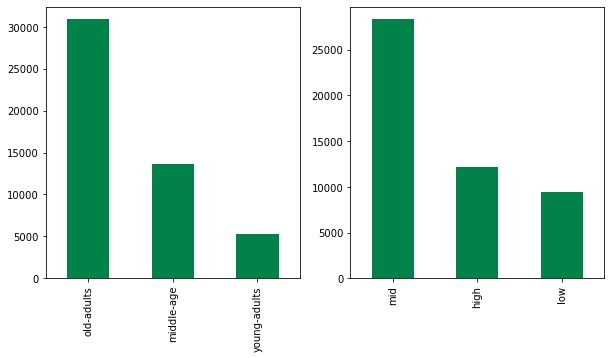

In [29]:
# df_all[df_all['event'] == 'offer viewed'].groupby('age_group').size()
fig,ax=plt.subplots(1,2,figsize = (10,5))
df_all[df_all['event'] == 'offer viewed']['age_group'].value_counts().plot(kind="bar",ax=ax[0]);
df_all[df_all['event'] == 'offer viewed']['income_group'].value_counts().plot(kind="bar",ax=ax[1]);

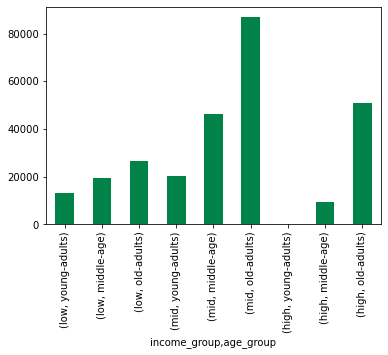

In [30]:
df_all.groupby(['income_group','age_group']).size().plot(kind = "bar");

Older Adults age group account for most of the every income group!

i will check on 'old-adults' age group and 'mid' income group, how they react to offers.

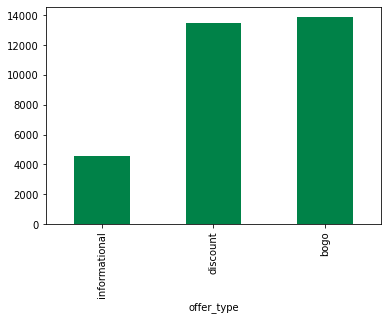

In [38]:
df_all[(df_all['age_group'] == 'old-adults') & (df_all['income_group'] == 'high')].groupby('offer_type').size().sort_values().plot(kind='bar');

conclusion for Q1 : "Create more Discount and Bogo offer types to Older Adults (50 and above) with high income (80000 and above)".

### Question 2: what is the average spendings for each group of people?

count    17000.000000
mean         5.350083
std          6.177211
min          0.000000
25%          1.429401
50%          4.214199
75%          7.774113
max        135.997500
Name: amount, dtype: float64

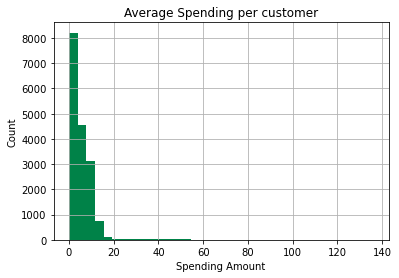

In [71]:
#average spending per customer
df_all.groupby('person')['amount'].mean().hist(bins=35)
plt.xlabel('Spending Amount')
plt.ylabel('Count')
plt.title('Average Spending per customer')
df_all.groupby('person')['amount'].mean().describe()

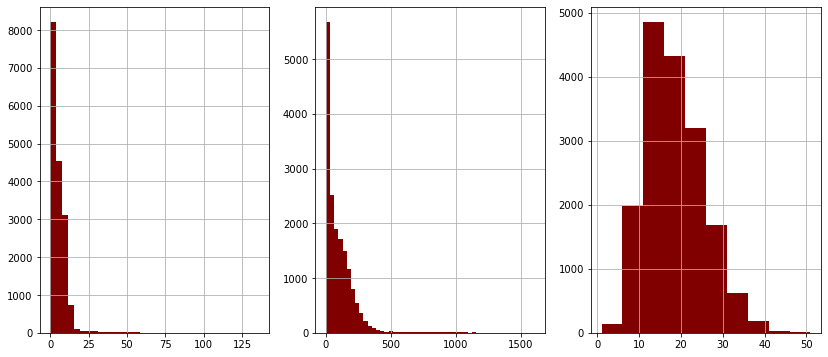

In [61]:

fig,ax=plt.subplots(1,3,figsize = (14,6))
#average spendings per customer
df_all.groupby('person')['amount'].mean().hist(bins=35,ax=ax[0],color='maroon')
#'TOTAL Spending per customer'
df_all.groupby('person')['amount'].sum().hist(bins=50,ax=ax[1],color='maroon')
#distribution of Number of transaction per customerr
df_all.groupby('person')['amount'].count().hist(ax=ax[2],color='maroon');



AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

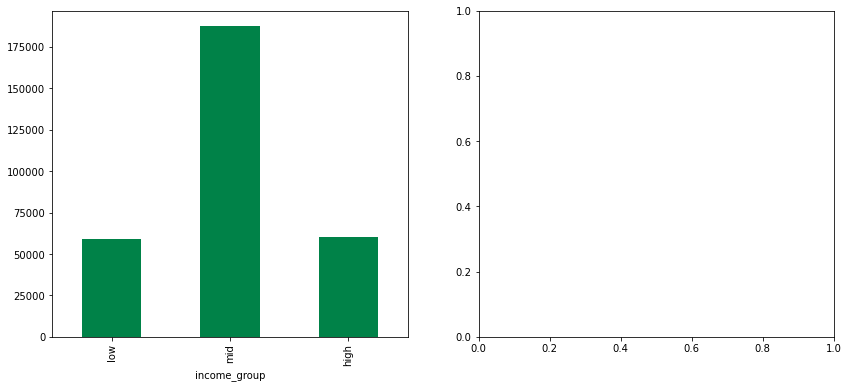

In [64]:
fig,ax=plt.subplots(1,2,figsize = (14,6))
df_all.groupby('income_group')['amount'].count().plot(kind="bar",ax=ax[0])
ax[0].xlabel('Number of transaction')
ax[0].ylabel('Average spendings')
ax[0].title('The distribution of Number of transaction per customer');

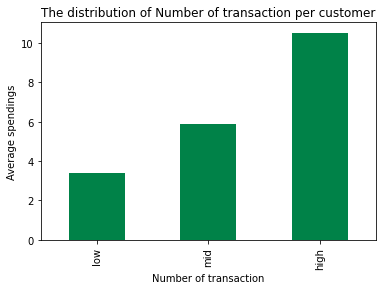

In [236]:
df_all.groupby('income_group')['amount'].mean().plot(kind="bar")
plt.xlabel('Number of transaction')
plt.ylabel('Average spendings')
plt.title('The distribution of Number of transaction per customer');

as excepted higher income group will pay in avg more, but mid income group will pay more and have way more transactions.

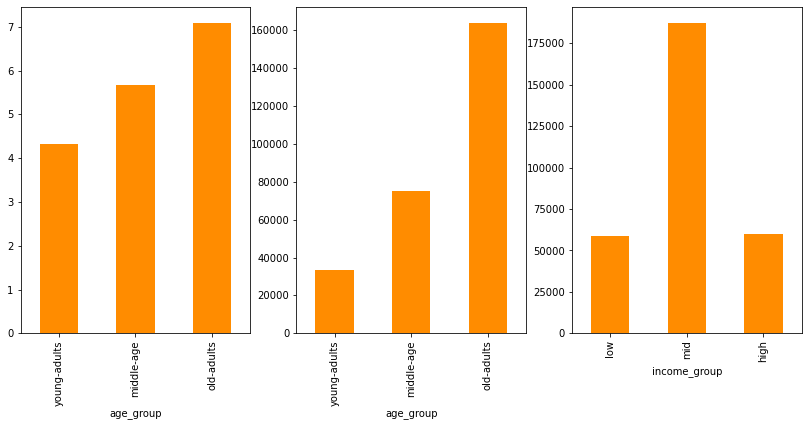

In [69]:
fig,ax=plt.subplots(1,3,figsize = (14,6))
df_all.groupby('age_group')['amount'].mean().plot(kind="bar",ax=ax[0],color='darkorange')
df_all.groupby('age_group')['amount'].count().plot(kind="bar",ax=ax[1],color='darkorange')
df_all.groupby('income_group')['amount'].count().plot(kind="bar",ax=ax[2],color='darkorange');

#old adults seems to pay more, probably because they are high income aswell

In [75]:
df_all.head(2)

,person,event,time,offer_id,amount,age,income,member_duration,gender_F,gender_M,...,difficulty,duration,offer_type,channel_email,channel_mobile,channel_social,channel_web,name,income_group,age_group
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,75.0,100000.0,1721.0,1.0,0.0,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,bogo_5_5_7,high,old-adults
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,75.0,100000.0,1721.0,1.0,0.0,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,bogo_5_5_7,high,old-adults


In [64]:
df_all.groupby('person')['amount'].head(2)

0         0.0
1         0.0
3         0.0
4         0.0
6         0.0
         ... 
286391    0.0
286392    0.0
286393    0.0
286394    0.0
306414    0.0
Name: amount, Length: 33999, dtype: float64

Question 2 conclusion: "in Average people pay around $5.35, mid income group will pay more and have way more transactions than other income groups and older adults pay way more than younger adults and middle age adults"

### Question 3: what is the most popular offer?

In [65]:
print('The total counts of different events for BOGO offer is')
print(df_all[df_all["offer_type"]=='bogo']['event'].value_counts())

print('\n\nThe total counts of different events for discount offer is')
print(df_all[df_all["offer_type"]=='discount']['event'].value_counts())

The total counts of different events for BOGO offer is
offer received     30499
offer viewed       25449
offer completed    15669
Name: event, dtype: int64


The total counts of different events for discount offer is
offer received     30543
offer viewed       21445
offer completed    17910
Name: event, dtype: int64


Text(0.5, 1.0, 'Total counts of different offer types \n')

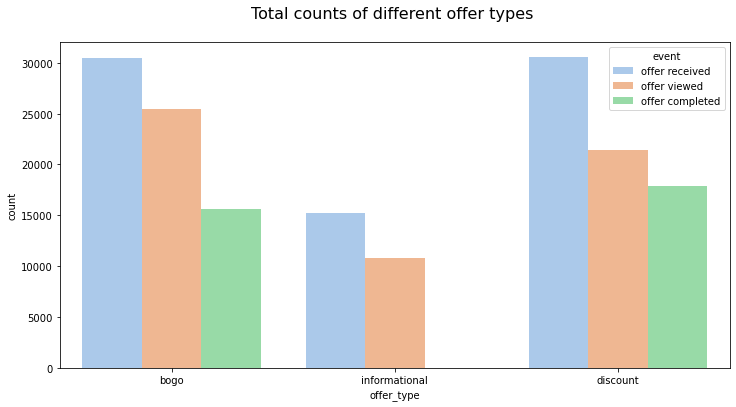

In [76]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x="offer_type", hue="event", data=df_all[~df_all.event.isin(['transaction'])], palette="pastel")
plt.title("Total counts of different offer types \n", fontsize=16)

In [67]:
df_all['offer_type'].unique()

array(['bogo', nan, 'informational', 'discount'], dtype=object)

bogo and discount are much popular than informational , i will compare the performance of discount vs bogo in terms of events!

In [73]:
#calculating counts
bogo_recieved=len(df_all[(df_all['event'] == 'offer received')&(df_all['offer_type'] == 'bogo')])
bogo_viewed=len(df_all[(df_all['event'] == 'offer viewed')&(df_all['offer_type'] == 'bogo')])
bogo_completed=len(df_all[(df_all['event'] == 'offer completed')&(df_all['offer_type'] == 'bogo')])
discount_recieved=len(df_all[(df_all['event'] == 'offer received')&(df_all['offer_type'] == 'discount')])
discount_viewed=len(df_all[(df_all['event'] == 'offer viewed')&(df_all['offer_type'] == 'discount')])
discount_completed=len(df_all[(df_all['event'] == 'offer completed')&(df_all['offer_type'] == 'discount')])
labels = ['completed/received', 'viewed/received', 'completed/viewed']
bogo_performance = [bogo_completed/bogo_recieved, bogo_viewed/bogo_recieved, bogo_completed/bogo_viewed]
discount_performance = [discount_completed/discount_recieved, discount_viewed/discount_recieved, discount_completed/discount_viewed]


In [74]:
def toplabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height percentage."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}%'.format(round(height*100, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

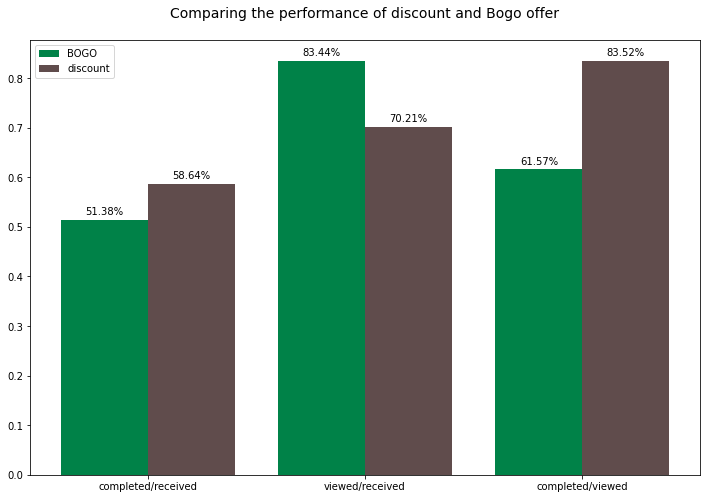

In [75]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set_palette(sns.color_palette(["#008248", "#604c4c", "#eac784", "#f0cddb", "#6B9997"]))
x = np.arange(len(labels)) 
width = 0.4  # the width of the bars
bar1 = ax.bar(x - width/2, bogo_performance, width, label='BOGO')
bar2 = ax.bar(x + width/2, discount_performance, width, label='discount')
ax.set_title('Comparing the performance of discount and Bogo offer\n', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
toplabel(bar1)
toplabel(bar2)


plt.show();

Q3 what is the most popular offer type is? Conclusion: 

<b> Discount offers are more popular and sucsseful </b> although BOGO offer has a much better chance to be viewed or seen by customers. discount offers completion rate is much higher than BOGO specially when its viewed.


### Q4: which offers are received that are viewed and completed or completed without getting viewed much?

In [78]:
#new col for offer represntaion as a combination of offer features
df_all['offer_name'] = df_all.offer_type.astype(str) + "_" + df_all.difficulty.astype(str) +\
                      "_" + df_all.reward.astype(str) + \
                     "_" + df_all.duration.astype(str)
                     

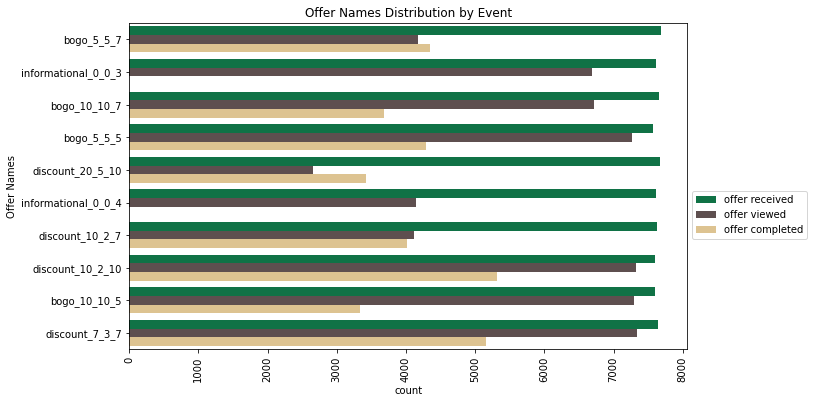

In [79]:
plt.figure(figsize=(10,6))
sns.countplot(y='offer_name', hue='event', data=df_all[~df_all.event.isin(['transaction'])]);
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.ylabel("Offer Names")
plt.title("Offer Names Distribution by Event");


here we can spot that the Bogo 5_5_7 and Discount_20_5_10 appeared to have much higher offer completed than offer viewed 

# Modelling

Goal is to predict the unwanted offers , if a person (viewed and did not use an offer) or (used it without viewing), then the offer is unwanted !

### creating a Target label

In [80]:
df_all['used'] = 1
person_offer_matrix = df_all.groupby(['person', 'offer_id','event'])['used'].max().unstack(fill_value=0)
person_offer_matrix

event                                                              offer completed  \
person                           offer_id                                            
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5                1   
                                 3f207df678b143eea3cee63160fa8bed                0   
                                 5a8bc65990b245e5a138643cd4eb9837                0   
                                 N/A                                             0   
                                 f19421c1d4aa40978ebb69ca19b0e20d                1   
...                                                                            ...   
ffff82501cea40309d5fdd7edcca4a07 0b1e1539f2cc45b7b9fa7c272da2e1d7                1   
                                 2906b810c7d4411798c6938adc9daaa5                1   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9                1   
                                 N/A                                             0   
                                 fafdcd668e3743c1bb461111dcafc2a4                1   

event                                                              offer received  \
person                           offer_id                                           
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5               1   
                                 3f207df678b143eea3cee63160fa8bed               1   
                                 5a8bc65990b245e5a138643cd4eb9837               1   
                                 N/A                                            0   
                                 f19421c1d4aa40978ebb69ca19b0e20d               1   
...                                                                           ...   
ffff82501cea40309d5fdd7edcca4a07 0b1e1539f2cc45b7b9fa7c272da2e1d7               1   
                                 2906b810c7d4411798c6938adc9daaa5               1   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9               1   
                                 N/A                                            0   
                                 fafdcd668e3743c1bb461111dcafc2a4               1   

event                                                              offer viewed  \
person                           offer_id                                         
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5             0   
                                 3f207df678b143eea3cee63160fa8bed             1   
                                 5a8bc65990b245e5a138643cd4eb9837             1   
                                 N/A                                          0   
                                 f19421c1d4aa40978ebb69ca19b0e20d             1   
...                                                                         ...   
ffff82501cea40309d5fdd7edcca4a07 0b1e1539f2cc45b7b9fa7c272da2e1d7             1   
                                 2906b810c7d4411798c6938adc9daaa5             1   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9             1   
                                 N/A                                          0   
                                 fafdcd668e3743c1bb461111dcafc2a4             1   

event                                                              transaction  
person                           offer_id                                       
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5            0  
                                 3f207df678b143eea3cee63160fa8bed            0  
                                 5a8bc65990b245e5a138643cd4eb9837            0  
                                 N/A                                         1  
                                 f19421c1d4aa40978ebb69ca19b0e20d            0  
...                                                                        ...  
ffff82501cea40309d5fdd7edcca4a07 0b1e1539f2cc45

In [81]:
#if a person (viewed but did not use an offer) or (used it without viewing), then the offer is unwanted 
person_offer_matrix['unwanted'] = np.where((person_offer_matrix["offer completed"]==1)&(person_offer_matrix["offer viewed"]==1), 0, 1)
person_offer_matrix

event                                                              offer completed  \
person                           offer_id                                            
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5                1   
                                 3f207df678b143eea3cee63160fa8bed                0   
                                 5a8bc65990b245e5a138643cd4eb9837                0   
                                 N/A                                             0   
                                 f19421c1d4aa40978ebb69ca19b0e20d                1   
...                                                                            ...   
ffff82501cea40309d5fdd7edcca4a07 0b1e1539f2cc45b7b9fa7c272da2e1d7                1   
                                 2906b810c7d4411798c6938adc9daaa5                1   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9                1   
                                 N/A                                             0   
                                 fafdcd668e3743c1bb461111dcafc2a4                1   

event                                                              offer received  \
person                           offer_id                                           
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5               1   
                                 3f207df678b143eea3cee63160fa8bed               1   
                                 5a8bc65990b245e5a138643cd4eb9837               1   
                                 N/A                                            0   
                                 f19421c1d4aa40978ebb69ca19b0e20d               1   
...                                                                           ...   
ffff82501cea40309d5fdd7edcca4a07 0b1e1539f2cc45b7b9fa7c272da2e1d7               1   
                                 2906b810c7d4411798c6938adc9daaa5               1   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9               1   
                                 N/A                                            0   
                                 fafdcd668e3743c1bb461111dcafc2a4               1   

event                                                              offer viewed  \
person                           offer_id                                         
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5             0   
                                 3f207df678b143eea3cee63160fa8bed             1   
                                 5a8bc65990b245e5a138643cd4eb9837             1   
                                 N/A                                          0   
                                 f19421c1d4aa40978ebb69ca19b0e20d             1   
...                                                                         ...   
ffff82501cea40309d5fdd7edcca4a07 0b1e1539f2cc45b7b9fa7c272da2e1d7             1   
                                 2906b810c7d4411798c6938adc9daaa5             1   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9             1   
                                 N/A                                          0   
                                 fafdcd668e3743c1bb461111dcafc2a4             1   

event                                                              transaction  \
person                           offer_id                                        
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5            0   
                                 3f207df678b143eea3cee63160fa8bed            0   
                                 5a8bc65990b245e5a138643cd4eb9837            0   
                                 N/A                                         1   
                                 f19421c1d4aa40978ebb69ca19b0e20d            0   
...                                                                        ...   
ffff82501cea40309d5fdd7edcca4a07 0b1e15

In [82]:
model_df = person_offer_matrix['unwanted']
model_df.reset_index(level=['person', 'offer_id'])
model_df= model_df.to_frame().reset_index()
model_df.head()

,person,offer_id,unwanted
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1
3,0009655768c64bdeb2e877511632db8f,N/A,1
4,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,0


in order to merge correctly and have a final good dataframe to train and test on , ill gather all the preproccessing done and modulate it to functions with any changes needed for the model.
### creating the Model DataFrame

In [155]:
def clean_profile(profile):
    new_profile=profile.copy()
    new_profile['became_member_on'] = pd.to_datetime(new_profile['became_member_on'], format='%Y%m%d')
    new_profile['member_duration'] = datetime.datetime.today().date() - new_profile['became_member_on'].dt.date
    new_profile['member_duration'] = new_profile['member_duration'].dt.days
    new_profile['member_duration']=  new_profile['member_duration'].fillna(0)   

    # fill empty genders
    new_profile['gender'] = new_profile['gender'].fillna('NA')
    new_profile[['age','income']] = new_profile[['age','income']].astype('int', errors='ignore')
    new_profile=new_profile.drop( new_profile[new_profile['age']>100].index )
    new_profile['income'] = new_profile['income'].fillna(new_profile['income'].mean())
    new_profile['age']=  new_profile['age'].fillna(0)
    new_profile['year'] = new_profile['became_member_on'].apply(lambda x: str(x.year))
    new_profile=new_profile.drop(['became_member_on'], axis=1)
    gender_dummies = new_profile['gender'].str.get_dummies().add_prefix('gender_')
    year_joined_dummies = new_profile['year'].str.get_dummies().add_prefix('year_joined_')
    year_joined_dummies=year_joined_dummies.fillna(0)
    new_profile = pd.concat([new_profile, gender_dummies, year_joined_dummies], axis=1)
    new_profile=new_profile.drop(['year','gender'], axis=1)
    return new_profile

In [96]:
def clean_portfolio(portfolio):
    new_portfolio = portfolio.copy()
    new_portfolio['channel_email'] = new_portfolio['channels'].apply(lambda x: 1 if 'email' in x else 0)
    new_portfolio['channel_mobile'] = new_portfolio['channels'].apply(lambda x: 1 if 'mobile' in x else 0)
    new_portfolio['channel_social'] = new_portfolio['channels'].apply(lambda x: 1 if 'social' in x else 0)
    new_portfolio['channel_web'] = new_portfolio['channels'].apply(lambda x: 1 if 'web' in x else 0)
    new_portfolio = new_portfolio.drop('channels', axis=1)
    dummies = pd.get_dummies(new_portfolio['offer_type'])
    new_portfolio = pd.concat([new_portfolio,dummies], axis = 1)
    new_portfolio = new_portfolio.drop('offer_type', axis=1)
    # unique_id = new_portfolio['id'].unique().tolist()
    # map_id = dict(zip(unique_id,range(len(unique_id))))
    # new_portfolio.replace({'id':map_id},inplace=True)
    
    return new_portfolio
    

In [152]:
def clean_transcript(transcript):
    transcript_new=transcript.copy()
    transcript_new['offer_id'] = transcript_new['value'].apply(lambda x: x['offer id'] if 'offer id' in x else x['offer_id'] if 'offer_id' in x else np.nan)
    transcript_new['amount'] = transcript_new['value'].apply(lambda x: x.get('amount', 0))
    transcript_new=transcript_new.drop('value',axis=1)
    return transcript_new
    

In [165]:

portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)
profile_clean=clean_profile(profile)
portfolio_clean=clean_portfolio(portfolio)
transcript_clean=clean_transcript(transcript)

    

In [166]:
profile_clean.isnull().sum()

age                 0
id                  0
income              0
member_duration     0
gender_F            0
gender_M            0
gender_O            0
year_joined_2013    0
year_joined_2014    0
year_joined_2015    0
year_joined_2016    0
year_joined_2017    0
year_joined_2018    0
dtype: int64

In [167]:
model_df=model_df.merge(profile_clean,how='left',left_on='person',right_on='id')
model_df.drop('id',axis=1,inplace=True)

In [109]:
model_df.head(2)

,person,offer_id,unwanted,age,income,member_duration,gender_F,gender_M,gender_O,year_joined_2013,...,difficulty,duration,id,channel_email,channel_mobile,channel_social,channel_web,bogo,discount,informational
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1,33.0,72000.0,1739.0,0.0,1.0,0.0,0.0,...,10,7,0,1,1,0,1,0,1,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1,33.0,72000.0,1739.0,0.0,1.0,0.0,0.0,...,0,4,1,1,1,0,1,0,0,1


In [163]:
model_df.head()

,person,offer_id,unwanted,age_x,income_x,member_duration_x,gender_F_x,gender_M_x,gender_O_x,year_joined_2013_x,...,member_duration_y,gender_F_y,gender_M_y,gender_O_y,year_joined_2013_y,year_joined_2014_y,year_joined_2015_y,year_joined_2016_y,year_joined_2017_y,year_joined_2018_y
0,0009655768c64bdeb2e877511632db8f,0,1,33.0,72000.0,1739.0,0.0,1.0,0.0,0.0,...,1740.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0009655768c64bdeb2e877511632db8f,1,1,33.0,72000.0,1739.0,0.0,1.0,0.0,0.0,...,1740.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0009655768c64bdeb2e877511632db8f,2,1,33.0,72000.0,1739.0,0.0,1.0,0.0,0.0,...,1740.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0009655768c64bdeb2e877511632db8f,3,0,33.0,72000.0,1739.0,0.0,1.0,0.0,0.0,...,1740.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0009655768c64bdeb2e877511632db8f,4,0,33.0,72000.0,1739.0,0.0,1.0,0.0,0.0,...,1740.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [168]:
model_df = model_df.merge(portfolio_clean, left_on='offer_id', right_on='id', how='left')

In [169]:
model_df.drop('id',axis=1,inplace=True)
model_df.head(2)

,person,offer_id,unwanted,age,income,member_duration,gender_F,gender_M,gender_O,year_joined_2013,...,reward,difficulty,duration,channel_email,channel_mobile,channel_social,channel_web,bogo,discount,informational
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1,33.0,72000.0,1740.0,0.0,1.0,0.0,0.0,...,2,10,7,1,1,0,1,0,1,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1,33.0,72000.0,1740.0,0.0,1.0,0.0,0.0,...,0,0,4,1,1,0,1,0,0,1


In [170]:
unique_offer_ids = model_df['offer_id'].unique().tolist()
mapping = dict(zip(unique_offer_ids,range(len(unique_offer_ids))))
model_df.replace({'offer_id':mapping},inplace=True)  

our model_df should be ready for modelling!
### Modelling and Evaluation

In [123]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [212]:
df=model_df.copy()
print(df['unwanted'].value_counts())
df.head(2)

1    38828
0    24460
Name: unwanted, dtype: int64


,person,offer_id,unwanted,age,income,member_duration,gender_F,gender_M,gender_O,year_joined_2013,...,reward,difficulty,duration,channel_email,channel_mobile,channel_social,channel_web,bogo,discount,informational
0,0009655768c64bdeb2e877511632db8f,0,1,33.0,72000.0,1740.0,0.0,1.0,0.0,0.0,...,2,10,7,1,1,0,1,0,1,0
1,0009655768c64bdeb2e877511632db8f,1,1,33.0,72000.0,1740.0,0.0,1.0,0.0,0.0,...,0,0,4,1,1,0,1,0,0,1


In [202]:
for col in df.columns:
    print(col,df[col].isnull().sum())

person 0
offer_id 0
unwanted 0
age 8084
income 8084
member_duration 8084
gender_F 8084
gender_M 8084
gender_O 8084
year_joined_2013 8084
year_joined_2014 8084
year_joined_2015 8084
year_joined_2016 8084
year_joined_2017 8084
year_joined_2018 8084
reward 0
difficulty 0
duration 0
channel_email 0
channel_mobile 0
channel_social 0
channel_web 0
bogo 0
discount 0
informational 0


In [213]:
for col in profile_clean.columns:
    if col== 'id':
        continue
    if col=='income':
        df[col]=  df[col].fillna(df['income'].mean())
    else:  
        df[col]=  df[col].fillna(0)

In [214]:
target=df['unwanted']
train=df.drop(['person','unwanted'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(train, target,test_size=0.2, random_state=42)

In [215]:
def model_results(model,y_test,y_pred):
    accuarcy=(y_pred == y_test).mean()
    cf_matrix=confusion_matrix(y_test,y_pred)
    print("best parameter",model.best_params_)
    print("precision score: ",model.best_score_)
    print("accuracy score: ",accuarcy)
    #visualaizing confusion matrix, ref:https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='icefire')
    

In [216]:


def build_model(clf,param_grid):
    model=GridSearchCV(clf,param_grid,cv=5, scoring =  ['accuracy', 'precision', 'recall','f1'], refit = 'precision',n_jobs=-1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    model_results(model,y_test,y_pred)
    return model

In [217]:
scaler=MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)


best parameter {'C': 100}
precision score:  0.8099334786542197
accuracy score:  0.7671828092905673


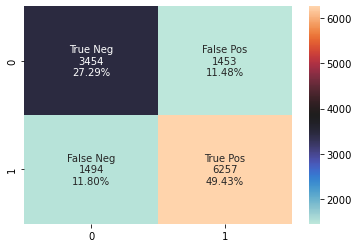

In [218]:
param_grid={'C':[100, 10, 1.0, 0.1, 0.01]}
log_model=build_model(LogisticRegression(max_iter=1000),param_grid)

best parameter {'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 500}
precision score:  0.8050262326839622
accuracy score:  0.7737399273186918


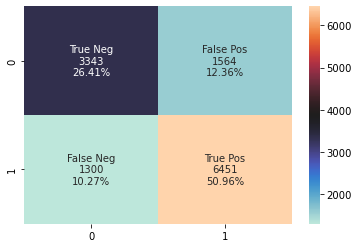

In [192]:
rfc_grid={'n_estimators':[80,40,100,200,500],
          'criterion': ['gini','entropy'],
          'min_samples_leaf': [1,2,3],
          'min_samples_split':[2,3,4]}
rfc=build_model(RandomForestClassifier(),rfc_grid)


In [219]:
rfc.estimator.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Feature importance

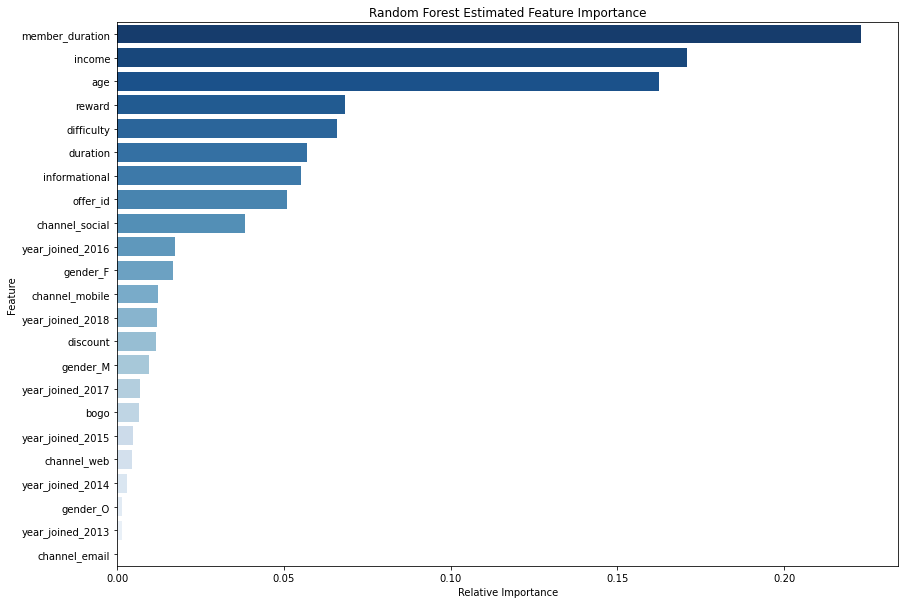

In [238]:
rfc_importance =rfc.best_estimator_.feature_importances_
relative_importance = rfc_importance / np.sum(rfc_importance)

feature_importance = pd.DataFrame(list(zip(X_train.columns,relative_importance)), columns=['feature', 'relative_importance'])

feature_importance = feature_importance.sort_values('relative_importance',
                                                    ascending=False)

feature_importance = feature_importance.reset_index(drop=True)

plt.figure(figsize=(14, 10))
sns.barplot(x='relative_importance',
            y='feature',
            data=feature_importance,
            palette='Blues_r')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.title('Random Forest Estimated Feature Importance');